## Exponential Splines
Exponential splines with 3 factors (no knots).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

% matplotlib inline
plt.rcParams['figure.figsize'] = 13, 6
plt.rcParams['text.usetex'] = True

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [5]:
def exp_splines(a, b1, b2, b3):
    assert b1 + b2 + b3 == 1., 'Betas must add up to 1.'
    res1 = []
    res2 = []
    res3 = []
    res = []
    for t in range(15):
        s1 = np.exp(-a*t)
        res1.append(s1)
        s2 = np.exp(-2*a*t)
        res2.append(s2)
        s3 = np.exp(-3*a*t)
        res3.append(s3)
        s = b1*s1 + b2*s2 + b3*s3
        res.append(s)
        
    fig, ax = plt.subplots()
    ax.plot(res1, label='1st', ls='--')
    ax.plot(res2, label='2nd', ls='--')
    ax.plot(res3, label='3rd', ls='--')
    ax.plot(res, c='black', label='spline', lw=3)
    ax.legend()
    ax.set_ylabel('S(t)', rotation=0)
    ax.set_title('Components of the Spline', size=14)

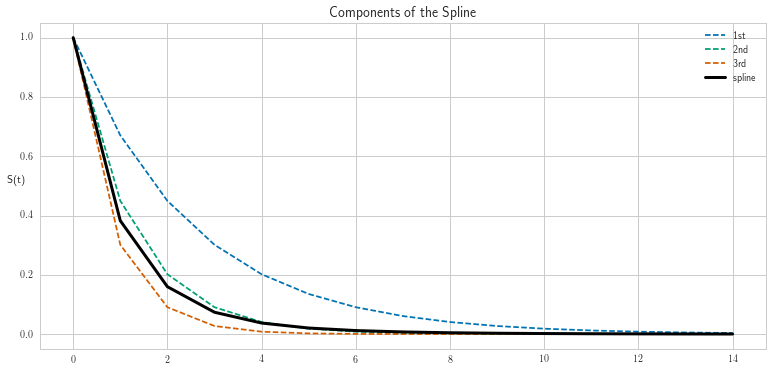

In [6]:
exp_splines(0.4, 0.1, 0.3, 0.6)

## Calibration
We find the best $\beta$ parameter estimates by performing a constrained OLS optimization.

In [125]:
X = [[1,5,2],
     [5,5,7],
     [3,4,9],
     [2,11,3],
     [1,2,18]]
b = [0.3, 0.2, 0.5]
y = np.dot(X,b) + np.random.normal(0, 0.25)

In [126]:
from scipy.optimize import least_squares
from scipy.optimize import minimize

def fun(X, b, y):
    return sum((np.dot(b,X) - y)**2)

b0 =[1,1,1]
cons = {'type': 'eq', 'fun': lambda b:  1 - sum(b)}

res = minimize(fun, b0, constraints=cons, args=(X, y))
bt = res.x
print 'Error: ' + str(sum((np.dot(X, bt) - y)**2))
res

Error: 0.0340319900336


     fun: 0.034031990033628078
     jac: array([-1.7863662 , -1.78668418, -1.79053049,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.26810651,  0.22079296,  0.51110053])